In [2]:
pip install tensorflow; streamlit; scikit-learn; pandas; nltk; matplotlib; seaborn

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.5-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.73.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached 

  You can safely remove it manually.
  You can safely remove it manually.


In [4]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import re
import nltk
import joblib
import numpy as np
import os

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, LSTM, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical 


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_essay(essay):
    essay = essay.lower()
    essay = re.sub(r'[^a-z\s]', '', essay)
    return ' '.join([word for word in essay.split() if word not in stop_words])


df = pd.read_excel("C:/Users/15129/Desktop/streamlit_ml_app/ai_human_detection_project/data/training_data/AI_vs_huam_train_dataset.xlsx")
df['clean_essay'] = df['essay'].apply(clean_essay)

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_essay'])
y = df['label']

svm = SVC(probability=True).fit(X, y)
tree = DecisionTreeClassifier().fit(X, y)
ada = AdaBoostClassifier().fit(X, y)

if not os.path.exists("models"):
    os.makedirs("models")

joblib.dump(tfidf, "models/tfidf_vectorizer.pkl")
joblib.dump(svm, "models/svm_model.pkl")
joblib.dump(tree, "models/decision_tree_model.pkl")
joblib.dump(ada, "models/adaboost_model.pkl")

tokenizer = Tokenizer(num_words = 10000, oov_token = "<OOV>" )
tokenizer.fit_on_texts(df['clean_essay'])
sequences = tokenizer.texts_to_sequence(df['clean_essay'])
X_seq = pad_sequences(sequences, maxlen = 300)
Y_seq = np.array(df['label'])

cnn_model = Sequential([
    Embedding(10000, 64, input_length = 300),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_cross_entropy', metrics=['accuracy'])
cnn_model.fit(X_seq, Y_seq, epochs=5, batch_size=32, verbose=1)
cnn_model.save("models/CNN.h5")

lstm_model = Sequential([
    Embedding(10000, 64, input_length = 300),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_cross_entropy', metrics=['accuracy'])
lstm_model.fit(X_seq, Y_seq, epochs=5, batch_size=32, verbose=1)
lstm_model.save("models/LSTM.h5")

rnn_model = Sequential([
    Embedding(10000, 64, input_length = 300),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_cross_entropy', metrics=['accuracy'])
rnn_model.fit(X_seq, Y_seq, epochs=5, batch_size=32, verbose=1)
rnn_model.save("models/RNN.h5")

joblib.dump(tokenizer, "models/tokenizer.pkl")

print("Models saved")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15129\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: 'data/training_data/AI_vs_huam_train_dataset.xlsx'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

 SVM 
Accuracy: 1.0
Confusion Matrix:


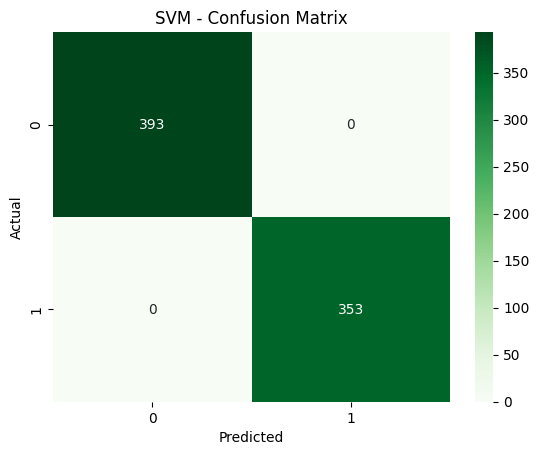

 Decision Tree 
Accuracy: 1.0
Confusion Matrix:


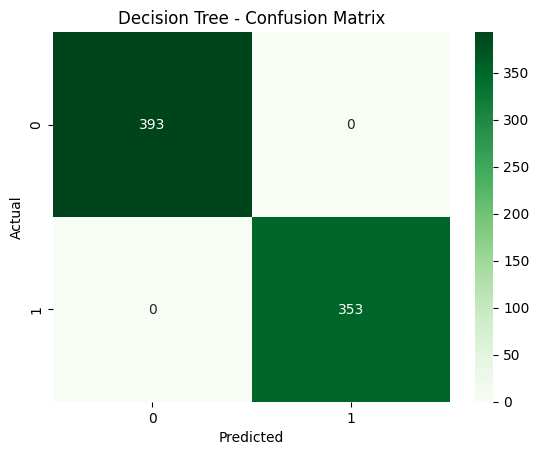

 AdaBoost 
Accuracy: 0.9463806970509383
Confusion Matrix:


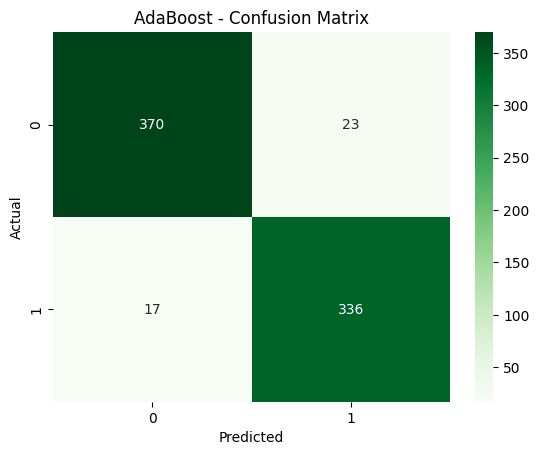

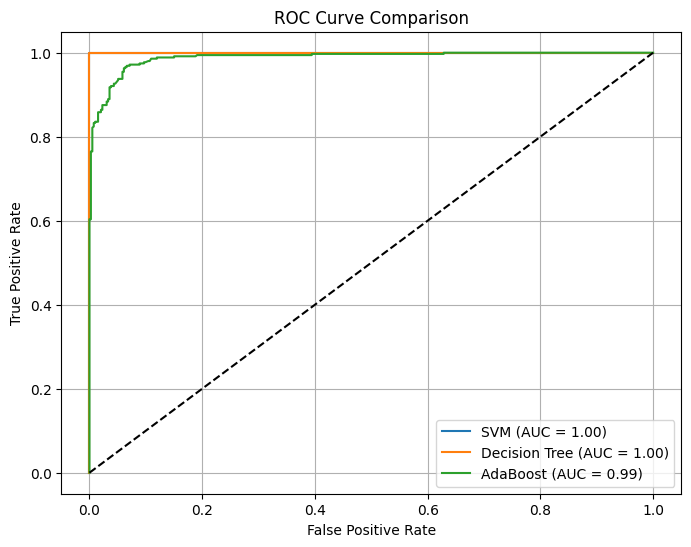

In [5]:
models = {
    "SVM": svm,
    "Decision Tree": tree,
    "AdaBoost": ada
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f" {name} ")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()